In [69]:
import xarray as xr
from oggm import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = utils.get_geodetic_mb_dataframe()

In [71]:
df.loc['RGI60-11.00897']

period       area  dmdtda  err_dmdtda  reg  \
rgiid                                                                       
RGI60-11.00897  2000-01-01_2010-01-01  8036000.0 -1.0425      0.2610   11   
RGI60-11.00897  2000-01-01_2020-01-01  8036000.0 -1.1003      0.1718   11   
RGI60-11.00897  2010-01-01_2020-01-01  8036000.0 -1.1580      0.2427   11   

                is_cor  
rgiid                   
RGI60-11.00897   False  
RGI60-11.00897   False  
RGI60-11.00897   False

In [72]:
df = df.loc[df.index.str.contains('-11.')]
df = df.loc[df.period == '2000-01-01_2020-01-01']

In [73]:
df

period       area    dmdtda  err_dmdtda  reg  \
rgiid                                                                         
RGI60-11.00001  2000-01-01_2020-01-01   122000.0 -0.893000    0.465100   11   
RGI60-11.00002  2000-01-01_2020-01-01  2292000.0 -0.524800    0.188600   11   
RGI60-11.00003  2000-01-01_2020-01-01   851000.0 -0.800700    0.224100   11   
RGI60-11.00004  2000-01-01_2020-01-01    53000.0 -0.383100    0.511400   11   
RGI60-11.00005  2000-01-01_2020-01-01    57000.0 -0.429900    0.436900   11   
...                               ...        ...       ...         ...  ...   
RGI60-11.03923  2000-01-01_2020-01-01    35000.0  0.465900    0.598500   11   
RGI60-11.03924  2000-01-01_2020-01-01    37000.0 -0.596372    0.400749   11   
RGI60-11.03925  2000-01-01_2020-01-01    10000.0 -0.596372    0.400749   11   
RGI60-11.03926  2000-01-01_2020-01-01    13000.0 -0.596372    0.400749   11   
RGI60-11.03927  2000-01-01_2020-01-01    15000.0 -0.596372    0.400749   11   

                is_cor  
rgiid                   
RGI60-11.00001   False  
RGI60-11.00002   False  
RGI60-11.00003   False  
RGI60-11.00004   False  
RGI60-11.00005   False  
...                ...  
RGI60-11.03923   False  
RGI60-11.03924    True  
RGI60-11.03925    True  
RGI60-11.03926    True  
RGI60-11.03927    True  

[3927 rows x 6 columns]

In [74]:
with xr.open_dataset('output/RGI11/bias-0.5.nc') as ds1:
    ds1 = ds1.load()
with xr.open_dataset('output/RGI11/bias-0.0.nc') as ds2:
    ds2 = ds2.load()
with xr.open_dataset('output/RGI11/bias+0.5.nc') as ds3:
    ds3 = ds3.load()

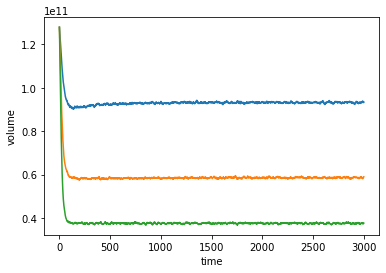

In [75]:
ds1.volume.sum(dim='rgi_id').plot();
ds2.volume.sum(dim='rgi_id').plot();
ds3.volume.sum(dim='rgi_id').plot();

In [76]:
ts = pd.DataFrame(data=ds2.volume.data, index=ds2.time, columns=ds2.rgi_id)
tsa = pd.DataFrame(data=ds2.area.data, index=ds2.time, columns=ds2.rgi_id)
# tsa = ds2.area.to_series()

In [77]:
df['OGGM'] = (ts.loc[19] - ts.loc[0]) / tsa.loc[0] / 20 * 0.9

In [78]:
len(ts.loc[0:19])

20

In [79]:
dfn = df.dropna()

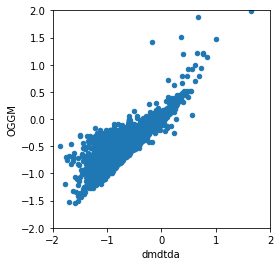

In [80]:
ax = dfn.plot.scatter(x='dmdtda', y='OGGM');
plt.xlim(-2, 2); plt.ylim(-2, 2);
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

In [81]:
np.average(dfn['dmdtda'], weights=dfn.area)

-0.8050864116483795

In [82]:
np.average(dfn['OGGM'], weights=dfn.area)

-0.7192885748592659